목차

# 1. XGBoost(**gradient boosting)**

- 앙상블 기법의 일종: 여러 모델을 합성한다.
- 하나의 엉성한 모델로부터 시작하고, 수차례 사이클을 돌면서 고쳐 나간다.

## 1-1. 순서

- 우선 시작을 단일 모델로 초기화를 시작한다. 이 모델은 매우 부정확 할 수 있다. (점점 고쳐 간다.)
- 반복
    1. 우선, 앙상블 안의 모델들에 대한 예측을 시행한다.
    2. 각 예측에 대하여 Error 값을 계산한다. (ex. Mean Absolute Error)
    3. 그 이후 계산된 Error을 새로운 모델에 적용시켜 앙상블 안에 추가한다.
        - 특히, Loss 값이 줄어드는 방향으로 파라미터를 결정
        - gradient boosting은 손실함수의 [**경사 하강**](https://www.notion.so/Intro-to-Deep-Learning_2-43c90aa9cc804a698b131dc45f83431d?pvs=21)을 이야기한다.
    4. 반복한다.
        
        ![xgboost.webp](https://www.notion.so/oreumi/Intermediate-Machine-Learning_5-10672ea5a9524d3eae7dc656fb9cc33d?pvs=4#9e413c87a60b4cb787b88c4b9c71fda7)

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split

mel_data = pd.read_csv('mel_train.csv')
mel_data.set_index('Id',inplace=True)

obj_cols = mel_data.select_dtypes('object').columns
obj_cols_under10 = [col for col in mel_data[obj_cols] if len(mel_data[obj_cols][col].unique()) <= 5]
num_cols = mel_data.drop(columns=obj_cols).columns[:-1]

my_cols = []
my_cols.extend(obj_cols_under10)
my_cols.extend(num_cols)

# 자동 으로 원핫 인코딩이 pandas 되는 함수
one_hot_datas = pd.get_dummies(mel_data[my_cols])
y = mel_data.SalePrice

X_train, X_valid, y_train, y_valid = train_test_split(one_hot_datas,y,train_size=0.8,random_state=0)

In [145]:
from xgboost import XGBRegressor

def boooost(n_estimators = 10):
    model = XGBRegressor(n_estimators=n_estimators,
                           learning_rate=0.01,
                           random_state = 0)

    model.fit(X_train, y_train)
    from sklearn.metrics import mean_absolute_error
    y_pred = model.predict(X_valid)

    return mean_absolute_error(y_pred, y_valid)

final_dict = {}
for i in range(50, 1000, 50):
    final_dict[i] = boooost(i)

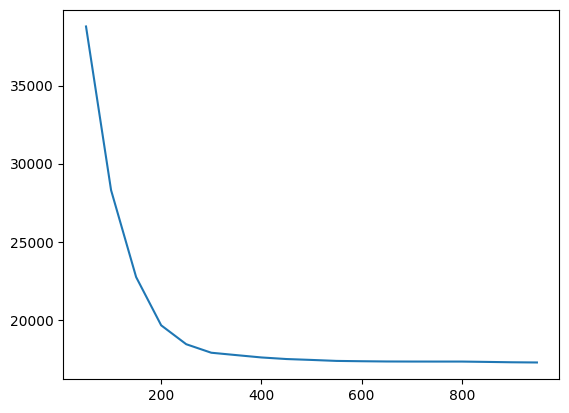

In [150]:
import matplotlib.pyplot as plt

plt.plot(final_dict.keys(),final_dict.values())

In [151]:
final_dict

{50: 38791.431132277394,
 100: 28303.13273223459,
 150: 22734.35209760274,
 200: 19640.80514233733,
 250: 18429.57015196918,
 300: 17883.695981378423,
 350: 17731.412831763697,
 400: 17581.32482074058,
 450: 17479.897327161816,
 500: 17422.445807470034,
 550: 17359.891628317637,
 600: 17339.160102739726,
 650: 17323.421741224316,
 700: 17318.79077482877,
 750: 17317.497297731163,
 800: 17317.91628317637,
 850: 17295.854425299658,
 900: 17272.19725224743,
 950: 17259.308794413526}

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split

mel_data = pd.read_csv('mel_train.csv')
mel_data.set_index('Id',inplace=True)

num_data = mel_data.select_dtypes('int' or 'float')

X_train, X_valid, y_train, y_valid = train_test_split(num_data.drop(columns='SalePrice'),
                                                      num_data.SalePrice,
                                                      random_state=0)

X_train.fillna(value=num_data.mean(),inplace=True)
X_valid.fillna(value=num_data.mean(),inplace=True)

Id
1145     80000
1100    157000
953     133900
578     164500
753     217000
         ...  
781     176000
922     145900
223     179900
17      149000
993     187000
Name: SalePrice, Length: 1095, dtype: int64